## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

D:\Tools\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Tools\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## hyper param setting 
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
monitors = ["val_acc", "val_loss"]
patiences = [5, 10, 15]

In [15]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

results = {}

for monitor in monitors:
    for patience in patiences:
        earlystop = EarlyStopping(monitor=monitor, 
                                  patience=patience, 
                                  verbose=1)
    
        print(f'Experiment: monitors {monitor} with patience: {patience}')
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        tag = f'exp_{monitor}_pat_{patience}'
        
        results[tag] = {'train-loss': train_loss,
                       'valid-loss': valid_loss,
                       'train-acc': train_acc,
                       'valid-acc': valid_acc}

Experiment: monitors val_acc with patience: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_30 (Batc (

50000/50000 [==============================] - 10s 196us/step - loss: 1.6169 - acc: 0.4348 - val_loss: 1.6706 - val_acc: 0.4136
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5429 - acc: 0.4599 - val_loss: 1.6346 - val_acc: 0.4213
Epoch 5/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.4891 - acc: 0.4809 - val_loss: 1.5958 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.4446 - acc: 0.4949 - val_loss: 1.5681 - val_acc: 0.4452
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4036 - acc: 0.5110 - val_loss: 1.5457 - val_acc: 0.4518
Epoch 8/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.3703 - acc: 0.5207 - val_loss: 1.5197 - val_acc: 0.4641
Epoch 9/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.3376 - acc: 0.5348 - val_loss: 1.5220 - val_acc: 0.4630
Epoch 10/50
50000/50000 [===================

50000/50000 [==============================] - 11s 212us/step - loss: 1.2776 - acc: 0.5560 - val_loss: 1.4861 - val_acc: 0.4752
Epoch 12/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.2499 - acc: 0.5664 - val_loss: 1.4758 - val_acc: 0.4816
Epoch 13/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.2229 - acc: 0.5780 - val_loss: 1.4844 - val_acc: 0.4783
Epoch 14/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.1990 - acc: 0.5875 - val_loss: 1.4705 - val_acc: 0.4840
Epoch 15/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.1765 - acc: 0.5949 - val_loss: 1.4610 - val_acc: 0.4887
Epoch 16/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.1519 - acc: 0.6023 - val_loss: 1.4724 - val_acc: 0.4887
Epoch 17/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.1286 - acc: 0.6137 - val_loss: 1.4640 - val_acc: 0.4870
Epoch 18/50
50000/50000 [=========

Epoch 12/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.2523 - acc: 0.5638 - val_loss: 1.5022 - val_acc: 0.4664
Epoch 13/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.2273 - acc: 0.5740 - val_loss: 1.4774 - val_acc: 0.4767
Epoch 14/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.2004 - acc: 0.5828 - val_loss: 1.4684 - val_acc: 0.4836
Epoch 15/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.1776 - acc: 0.5915 - val_loss: 1.4752 - val_acc: 0.4853
Epoch 16/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.1540 - acc: 0.6005 - val_loss: 1.4624 - val_acc: 0.4852
Epoch 17/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.1305 - acc: 0.6108 - val_loss: 1.4654 - val_acc: 0.4846
Epoch 18/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.1074 - acc: 0.6181 - val_loss: 1.4573 - val_acc: 0.4876
Epoch 19/50
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.1836 - acc: 0.2810 - val_loss: 2.1147 - val_acc: 0.3313
Epoch 2/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7370 - acc: 0.3971 - val_loss: 1.8409 - val_acc: 0.3836
Epoch 3/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.6150 - acc: 0.4369 - val_loss: 1.6741 - val_acc: 0.4227
Epoch 4/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.5426 - acc: 0.4601 - val_loss: 1.6252 - val_acc: 0.4299
Epoch 5/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.4867 - acc: 0.4809 - val_loss: 1.5907 - val_acc: 0.4415
Epoch 6/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.4402 - acc: 0.4983 - val_loss: 1.5626 - val_acc: 0.4500
Epoch 7/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.3989 - acc: 0.5140 - val_loss: 1.

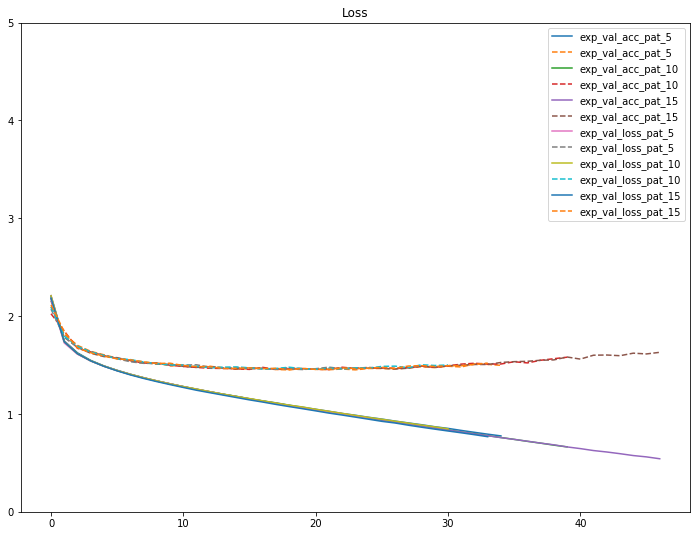

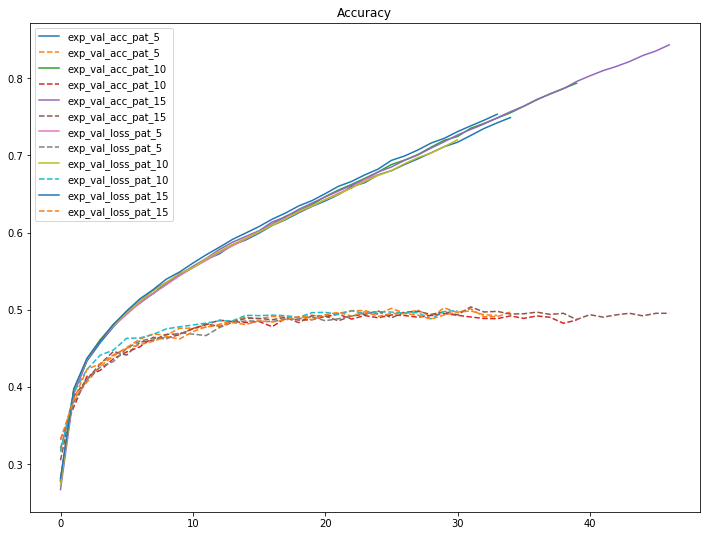

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()

In [31]:
best_loss = {}
best_acc = {}
for key in results.keys():
    best_loss[key] = min(results.get(key)['valid-loss'])
    best_acc[key] = max(results.get(key)['valid-acc'])    

In [32]:
best_loss

{'exp_val_acc_pat_5': 1.4504402700424195,
 'exp_val_acc_pat_10': 1.4542262813568114,
 'exp_val_acc_pat_15': 1.4595222946166992,
 'exp_val_loss_pat_5': 1.4538587057113648,
 'exp_val_loss_pat_10': 1.4568276765823365,
 'exp_val_loss_pat_15': 1.4536100326538086}

In [33]:
best_acc

{'exp_val_acc_pat_5': 0.5023000004768372,
 'exp_val_acc_pat_10': 0.4949999990463257,
 'exp_val_acc_pat_15': 0.5035999998092652,
 'exp_val_loss_pat_5': 0.49590000057220457,
 'exp_val_loss_pat_10': 0.49880000109672545,
 'exp_val_loss_pat_15': 0.4984000002384186}

## Ans
The lowest loss is using monitor:'val_acc' with patience: 5
, and the highest acc is using monitor:'val_acc' with patience: 15.      
But there is no significant difference in these combinations.